# Visualization (fmap) files of BIDS folder (.nii generated by heudiconv)
==> This will help us to understand what they are, and to select the right ones to be used by fmriprep

@author : Romy


Neuroimaging data is often stored in the format of nifti files .nii which can also be compressed using gzip .nii.gz. 

These files store both 3D and 4D data and also contain structured metadata in the image header.

Ressources : 
- https://doubleshow.github.io/bai-book/labs/lab-image/index.html
- http://nipy.org/nipy/api/generated/nipy.labs.mask.html
- http://nilearn.github.io/manipulating_images/input_output.html
- https://nilearn.github.io/modules/generated/nilearn.masking.compute_background_mask.html#nilearn.masking.compute_background_mask
- https://www.brainmapping.org/MarkCohen/Papers/EPI-fMRI.html#Anchor-47857


NB : You can check in which directory nilearn will store the data with the function nilearn.datasets.get_data_dirs.



In [60]:
# Import modules & select visualization specs

import numpy as np
import matplotlib.pyplot as plt
import os
from os import path
import imp
import pandas as pd

import nilearn
import dicom2nifti
import nibabel as nib
import scipy.ndimage as ndi
from nilearn import plotting
from nilearn.image.image import mean_img
from nilearn.plotting import plot_epi, show
import nilearn.image as image

import imageio as iio


#### Enter variables of images we want to open ####
id_subject = "32" 
modality = "fmap" #can be "fmap","func" or "anat"


#BIDS generated nifti compressed files (.nii.gz) :
nib_path = imp.find_module('nibabel')[1] #path to nibabel module (use it to find the mask)
heudi_path = "/mnt/data/romy/hypnomed/MRI_raw/BIDS/sub-{}/ses-001/{}".format(id_subject,modality) 
df_idmap = "/home/romy.beaute/projects/hypnomed/code/Visualize/infos/map_subid_neuco.csv"
df_subcode = "/home/romy.beaute/projects/hypnomed/code/Visualize/infos/sub_ids.csv"
output_images = "/home/romy.beaute/projects/hypnomed/code/Visualize/fmap_images/sub-{}".format(id_subject)
if not os.path.isdir(output_images):
    os.makedirs(output_images)


In [61]:
df = pd.read_csv(df_subcode)
df

,Unnamed: 0,sub_id,neucose_id,image_type,age
0,sub-01,EH070,NEUCOSE_ELSES07842,"['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']",028Y
1,sub-02,LP087,NEUCOSE_LECPA07862,"['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']",027Y
2,sub-03,HM076,NEUCOSE_HARMA07939,"['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']",022Y
3,sub-04,BA043,NEUCOSE_BUEAL07925,"['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']",022Y
4,sub-05,BA093,NEUCOSE_BLUAL07960,"['ORIGINAL', 'PRIMARY', 'M', 'ND']",025Y
5,sub-06,MP091,NEUCOSE_MANPA07927,"['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']",056Y
6,sub-07,BL067,NEUCOSE_BETLO07962,"['ORIGINAL', 'PRIMARY', 'M', 'ND']",021Y
7,sub-08,GM021,NEUCOSE_MAUGI07290,"['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']",063Y
8,sub-09,NJ029,NEUCOSE_NICJU06244,"['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']",028Y
9,sub-10,BC082,NEUCOSE_BOLCL07876,"['ORIGINAL', 'PRIMARY', 'M', 'ND', 'NORM']",024Y


In [24]:
niftis_folder_path = "/mnt/data/romy/hypnomed/MRI_raw/BIDS/sub-{}/ses-001/{}".format(id_subject,modality) 
nifti_files = [file for file in os.listdir(niftis_folder_path) if file.endswith('.nii.gz')] 
print('Nifti files generated by heudiconv (subject = sub-{} & modality = {})\n'.format(id_subject,modality))
print(nifti_files)

Nifti files generated by heudiconv (subject = sub-32 & modality = fmap)

['sub-32_ses-001_magnitude3.nii.gz', 'sub-32_ses-001_phasediff2.nii.gz', 'sub-32_ses-001_magnitude5.nii.gz', 'sub-32_ses-001_magnitude2.nii.gz', 'sub-32_ses-001_phasediff5.nii.gz', 'sub-32_ses-001_phasediff3.nii.gz', 'sub-32_ses-001_phasediff1.nii.gz', 'sub-32_ses-001_phasediff4.nii.gz', 'sub-32_ses-001_magnitude1.nii.gz', 'sub-32_ses-001_magnitude4.nii.gz']


In [36]:
def fmap_images(nifti_idx,save_im=False):
    fname = nifti_files[nifti_idx]
    nifti_file_path = os.path.join(niftis_folder_path,fname)
    print(nifti_file_path)
    data = nib.load(nifti_file_path)
    #print(data.get_fdata().shape)

    if save_im:
        mean_img = image.mean_img(data) #If a 3D image is given, suggested to use the mean image.
        epi_plot = plot_epi(mean_img, title='{} (Mean EPI image)'.format(fname),black_bg=True)
        epi_plot.savefig(output_images+'/{}_epi.png'.format(fname))
        epi_plot.close()
        #savefig(output_images+'/{}_epi.png'.format(f))
        img_plot = plotting.plot_img(data,title='{}'.format(fname))
        img_plot.savefig(output_images+'/{}.png'.format(fname))
        img_plot.close()
        
    else: 
        epi_plot = 'NaN'
        img_plot = 'NaN'

        return epi_plot,img_plot,data

In [43]:
for idx,nifti in enumerate(nifti_files):
    epi_plot,img_plot,data = fmap_images(nifti_idx=idx,save_im=True)
   

/mnt/data/romy/hypnomed/MRI_raw/BIDS/sub-32/ses-001/fmap/sub-32_ses-001_magnitude3.nii.gz
<bound method DataobjImage.get_fdata of <nibabel.nifti1.Nifti1Image object at 0x7f2b717de430>>
/mnt/data/romy/hypnomed/MRI_raw/BIDS/sub-32/ses-001/fmap/sub-32_ses-001_phasediff2.nii.gz
<bound method DataobjImage.get_fdata of <nibabel.nifti1.Nifti1Image object at 0x7f2b717de6a0>>
/mnt/data/romy/hypnomed/MRI_raw/BIDS/sub-32/ses-001/fmap/sub-32_ses-001_magnitude5.nii.gz
<bound method DataobjImage.get_fdata of <nibabel.nifti1.Nifti1Image object at 0x7f2b717de3d0>>
/mnt/data/romy/hypnomed/MRI_raw/BIDS/sub-32/ses-001/fmap/sub-32_ses-001_magnitude2.nii.gz
<bound method DataobjImage.get_fdata of <nibabel.nifti1.Nifti1Image object at 0x7f2b717debe0>>
/mnt/data/romy/hypnomed/MRI_raw/BIDS/sub-32/ses-001/fmap/sub-32_ses-001_phasediff5.nii.gz
<bound method DataobjImage.get_fdata of <nibabel.nifti1.Nifti1Image object at 0x7f2b717de4c0>>
/mnt/data/romy/hypnomed/MRI_raw/BIDS/sub-32/ses-001/fmap/sub-32_ses-001_pha

In [51]:
#Get infos from data
epi_plot,img_plot,data = fmap_images(nifti_idx=0,save_im=False)
print(data.header)

/mnt/data/romy/hypnomed/MRI_raw/BIDS/sub-32/ses-001/fmap/sub-32_ses-001_magnitude3.nii.gz
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 57
dim             : [  3 128 108  80   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : int16
bitpix          : 16
slice_start     : 0
pixdim          : [-1.   2.   2.   2.   2.4  0.   0.   0. ]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'TE=15;Time=113043.915;phase=1'
aux_file        : b''
qform_code      : scanner
sform_code      : scanner
quatern_b       : -0.008154193
quatern_c       : -0

# ------------------------------------------

### Compute a mask file from fMRI nifti file(s)


Compute and write the mask of an image based on the grey level

The default strategy to compute a mask, eg in NiftiMasker is to try to detect the background.

With data that has already been masked, this will work well, as it lies on a homogeneous background



(128, 108, 80)


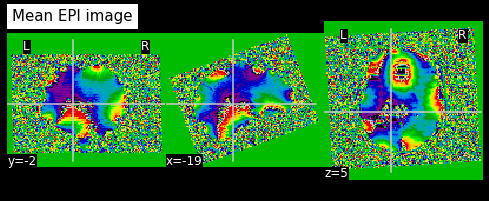

In [88]:


mask = nilearn.masking.compute_background_mask(mean_img)
# print(mask.header) #get informations about the created mask


#Simple mask extraction from EPI images We need to specify an ‘epi’ mask_strategy, as this is raw EPI data

# masker = NiftiMasker(mask_strategy='epi')
# masker.fit(mean_img)
# report = masker.generate_report()
# report

### Computing a mask from raw EPI data
From raw EPI data, there is no uniform background, and a different strategy is necessary



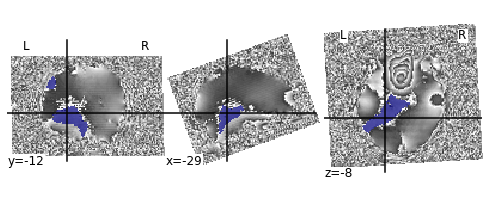

In [98]:
from nilearn.input_data import NiftiMasker
import nilearn.image as image
from nilearn.plotting import plot_roi, plot_epi, show
from nilearn.masking import compute_epi_mask
from nilearn.plotting import plot_roi


mask_img = compute_epi_mask(nifti_file_path) #Simple computation of a mask from the fMRI data
plot_roi(mask_img, mean_img) # Visualize it as an ROI


Created <class 'numpy.ndarray'> nifti object of shape (128, 108, 80)


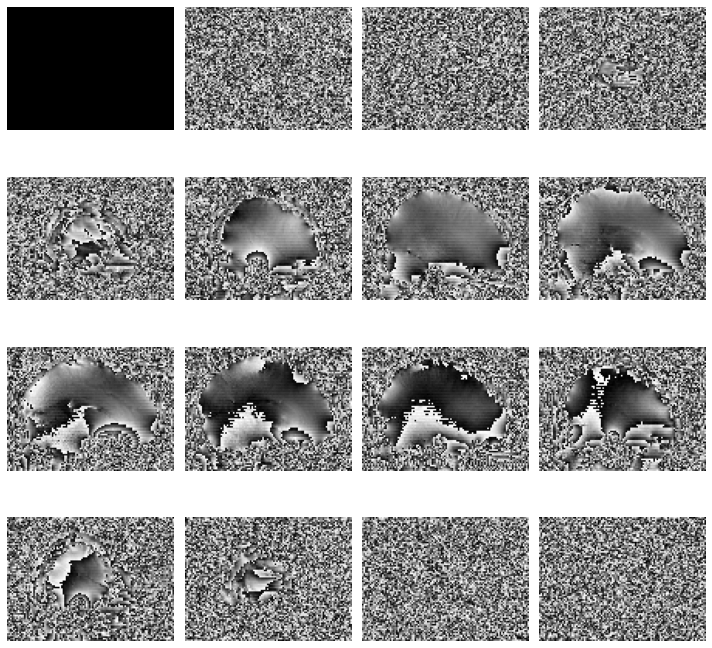

In [36]:
brain_vol_data = data.get_fdata() #get data in numpy array
print("Created {} nifti object of shape {}".format(type(brain_vol_data),brain_vol_data.shape))

fig_rows = 4
fig_cols = 4
n_subplots = fig_rows * fig_cols
n_slice = brain_vol_data.shape[0]
step_size = n_slice // n_subplots
plot_range = n_subplots * step_size
start_stop = int((n_slice - plot_range) / 2)

fig, axs = plt.subplots(fig_rows, fig_cols, figsize=[10, 10])

for idx, img in enumerate(range(start_stop, plot_range, step_size)):
    axs.flat[idx].imshow(ndi.rotate(brain_vol_data[img, :, :], 90), cmap='gray')
    axs.flat[idx].axis('off')
        
plt.tight_layout()
plt.show()
